# Week 6 Seminar Answers

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas>=0.24 in c:\users\gongh\anaconda3\lib\site-packages (from yfinance) (1.0.5)



In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

## Question 1

In [3]:
data = yf.download("AMZN TSLA", start="2020-01-01", end="2020-10-31")

[*********************100%***********************]  2 of 2 completed


In [4]:
data.tail()

Adj Close                    Close                     High  \
                   AMZN        TSLA         AMZN        TSLA         AMZN   
Date                                                                        
2020-10-26  3207.040039  420.279999  3207.040039  420.279999  3282.979980   
2020-10-27  3286.330078  424.679993  3286.330078  424.679993  3291.659912   
2020-10-28  3162.780029  406.019989  3162.780029  406.019989  3264.020020   
2020-10-29  3211.010010  410.829987  3211.010010  410.829987  3257.250000   
2020-10-30  3036.149902  388.040009  3036.149902  388.040009  3167.000000   

                                Low                     Open              \
                  TSLA         AMZN        TSLA         AMZN        TSLA   
Date                                                                       
2020-10-26  425.760010  3153.300049  410.000000  3198.739990  411.630005   
2020-10-27  430.500000  3211.300049  420.100006  3224.939941  423.760010   
2020-10-28  418.600006  3162.469971  406.000000  3249.300049  416.480011   
2020-10-29  418.059998  3164.000000  406.459991  3201.270020  409.959991   
2020-10-30  407.589996  3019.000000  379.109985  3157.750000  406.899994   

             Volume            
               AMZN      TSLA  
Date                           
2020-10-26  5901200  28239200  
2020-10-27  4291000  22686500  
2020-10-28  5588300  25451400  
2020-10-29  6596500  22655300  
2020-10-30  8386400  42511300

## Question 2

In [5]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2020-01-02 to 2020-10-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    211 non-null    float64
 1   TSLA    211 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

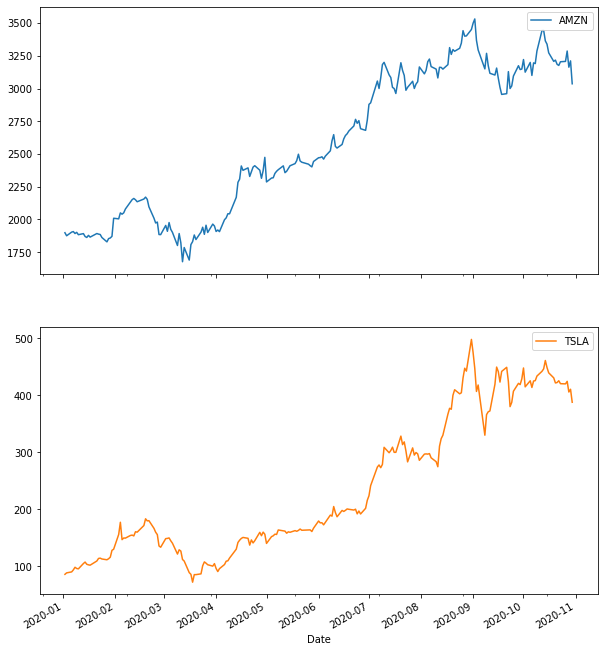

In [6]:
ADJ.plot(figsize=(10, 12), subplots=True)

## Question 3

In [7]:
ADJ.describe().round(2)

,AMZN,TSLA
count,211.00,211.00
mean,2583.27,236.98
std,546.55,123.55
min,1676.61,72.24
25%,2010.45,143.44
50%,2478.40,179.88
75%,3138.56,348.24
max,3531.45,498.32


In [8]:
rets = np.log(ADJ / ADJ.shift(1))
rets.head().round(4)

,AMZN,TSLA
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.0122,0.0292
2020-01-06,0.0148,0.0191
2020-01-07,0.0021,0.0381
2020-01-08,-0.0078,0.0480


## Question 4

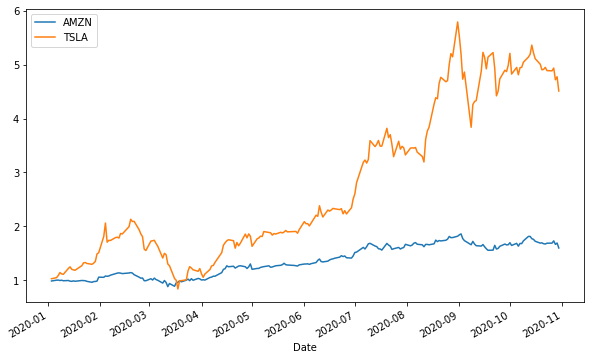

In [9]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

## Question 5

In [10]:
sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2020-10-26,3207.040039
2020-10-27,3286.330078
2020-10-28,3162.780029
2020-10-29,3211.010010
2020-10-30,3036.149902


In [11]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2020-10-26,3207.040039,3233.527454,3216.449988
2020-10-27,3286.330078,3240.599963,3219.357324
2020-10-28,3162.780029,3241.302466,3219.756490
2020-10-29,3211.010010,3240.789966,3219.856156
2020-10-30,3036.149902,3236.347461,3216.708655


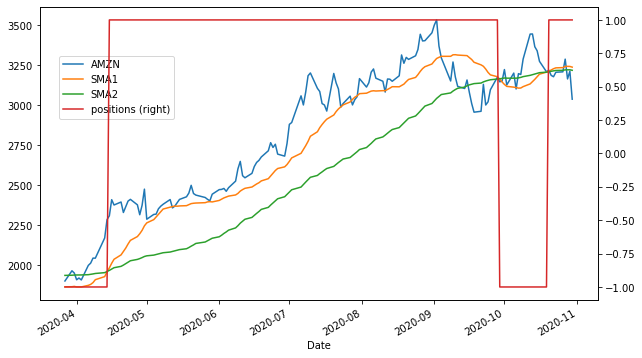

In [13]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Question 6

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

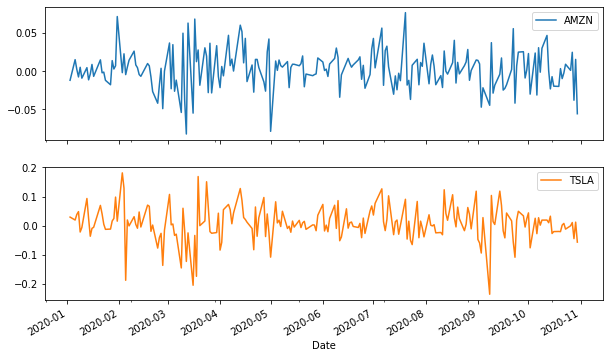

In [14]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='TSLA', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='TSLA'>,
        <AxesSubplot:xlabel='TSLA', ylabel='TSLA'>]], dtype=object)

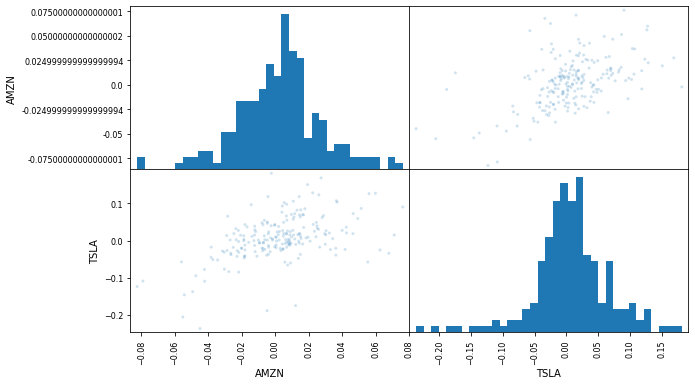

In [15]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

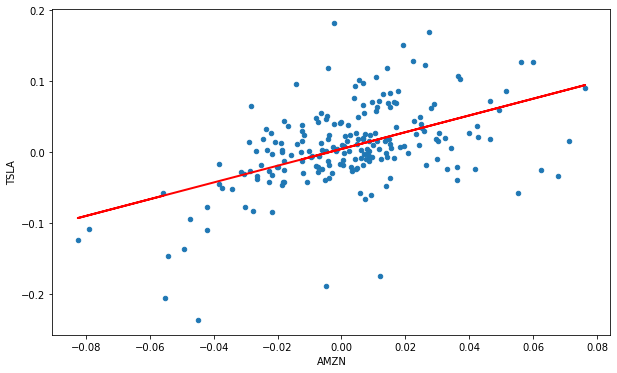

In [16]:
reg = np.polyfit(rets['AMZN'], rets['TSLA'], deg=1)
ax = rets.plot(kind='scatter', x='AMZN', y='TSLA', figsize=(10, 6))
ax.plot(rets['AMZN'], np.polyval(reg, rets['AMZN']), 'r', lw=2);

In [17]:
rets.corr()

,AMZN,TSLA
AMZN,1.000000,0.500254
TSLA,0.500254,1.000000


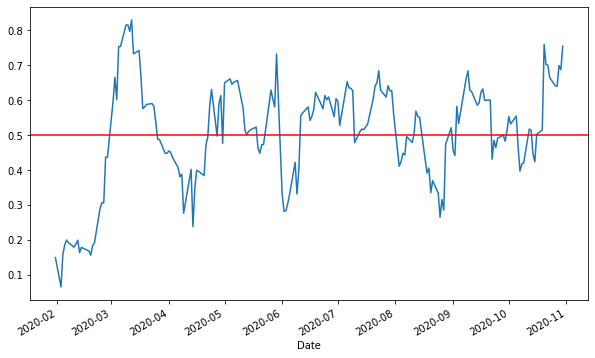

In [18]:
ax = rets['AMZN'].rolling(window=20).corr(rets['TSLA']).plot(figsize=(10, 6)) 
ax.axhline(rets.corr().iloc[0, 1], c='r');